**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip -q install yellowbrick
!pip install --upgrade sklearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier


In [ ]:
import pickle
with open('titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [ ]:
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=4)



> **Vamos testar o modelo?**



In [ ]:
modelo.fit(X_treino, y_treino)  # Treina o modelo
previsoes = modelo.predict(X_teste)  # Faz as previsões

In [ ]:
previsoes

array(['não', 'não', 'não', 'não', 'sim', 'sim', 'sim', 'sim', 'não',
       'não', 'não', 'não', 'não', 'sim', 'não', 'sim', 'sim', 'não',
       'não', 'não', 'não', 'não', 'não', 'não', 'não', 'não', 'não',
       'não', 'não', 'sim', 'não', 'sim', 'sim', 'não', 'não', 'não',
       'sim', 'não', 'não', 'sim', 'não', 'sim', 'sim', 'não', 'não',
       'não', 'não', 'não', 'sim', 'sim', 'sim', 'sim', 'não', 'sim',
       'sim', 'não', 'não', 'sim', 'sim', 'não', 'não', 'não', 'sim',
       'sim', 'sim', 'não', 'sim', 'sim', 'não', 'não', 'não', 'não',
       'sim', 'não', 'sim', 'não', 'sim', 'não', 'sim', 'não', 'sim',
       'não', 'não', 'não', 'não', 'não', 'sim', 'não', 'sim', 'sim',
       'sim', 'não', 'não', 'sim', 'não', 'sim', 'não', 'não', 'sim',
       'sim', 'não', 'não', 'não', 'sim', 'sim', 'não', 'sim', 'não',
       'sim', 'sim', 'não', 'sim', 'sim', 'não', 'sim', 'não', 'sim',
       'sim', 'não', 'não', 'não', 'sim', 'não', 'não', 'não', 'sim',
       'sim', 'não',



> **Será se o modelo acertou?**



In [ ]:
y_teste

,Survived
1148,não
1049,não
982,não
808,não
1195,sim
...,...
572,sim
140,não
1182,sim
312,não


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8473282442748091

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[141,  18],
       [ 22,  81]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8473282442748091

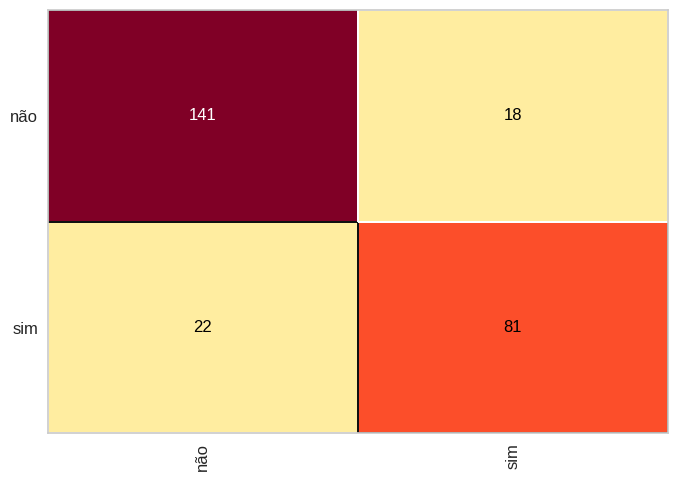

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         não       0.87      0.89      0.88       159
         sim       0.82      0.79      0.80       103

    accuracy                           0.85       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.85      0.85      0.85       262



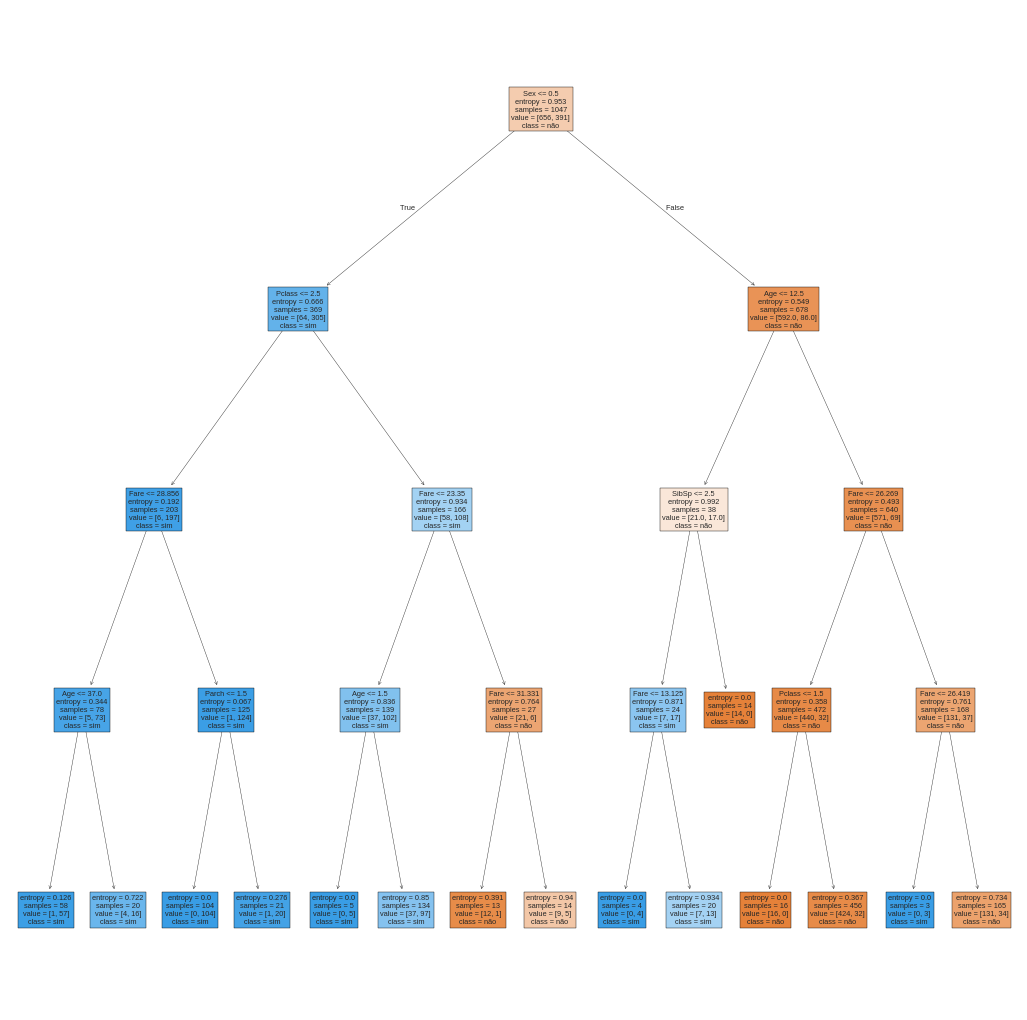

In [ ]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);